In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

import datapane as dp

In [2]:
dir_path = os.getcwd()

dir_path

'W:\\Github\\Personal Projects\\sales-analysis-reporting\\Notebook'

In [3]:
path_to_files = './../Sales_Data_Monthly'
files = [file for file in os.listdir(path_to_files) if not file.startswith('.')]
len(files)

12

In [4]:
path_to_combined_csv = './../Sales_Data_Yearly'
sales_data_combined = pd.DataFrame()

for file in files:
    current_month_data = pd.read_csv(path_to_files + '/' + file)
    sales_data_combined = pd.concat([sales_data_combined, current_month_data])

sales_data_combined.to_csv(path_to_combined_csv + '/combined_yearly_data_2019.csv', index = False)

In [5]:
df = pd.read_csv(path_to_combined_csv + '/combined_yearly_data_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182364,Wired Headphones,1,11.99,04/09/19 05:08,"723 Center St, San Francisco, CA 94016"
1,182365,Wired Headphones,1,11.99,04/10/19 22:18,"618 Highland St, New York City, NY 10001"
2,182366,AAA Batteries (4-pack),3,2.99,04/13/19 23:06,"794 Elm St, Atlanta, GA 30301"
3,182367,Gaming Mouse,1,100.00,04/14/19 18:03,"9 10th St, San Francisco, CA 94016"
4,182368,Normal Keyboard,1,99.99,04/17/19 15:14,"590 7th St, New York City, NY 10001"


In [6]:
df.shape

(192604, 6)

In [7]:
df['Quantity Ordered'].unique()

array([ 1,  3,  2,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [8]:
df.isna().sum() # No null rows cuz I made the data and so, didn't let any null values through

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Adding a Month column

In [9]:
df['Month'] = df['Order Date'].str[0:2]
df.Month = df['Month'].apply(pd.to_numeric)

In [10]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,182364,Wired Headphones,1,11.99,04/09/19 05:08,"723 Center St, San Francisco, CA 94016",4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192604 entries, 0 to 192603
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          192604 non-null  int64  
 1   Product           192604 non-null  object 
 2   Quantity Ordered  192604 non-null  int64  
 3   Price Each        192604 non-null  float64
 4   Order Date        192604 non-null  object 
 5   Purchase Address  192604 non-null  object 
 6   Month             192604 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 10.3+ MB


### Adding a sales value column (Quantity * price of each)

In [12]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,182364,Wired Headphones,1,11.99,04/09/19 05:08,"723 Center St, San Francisco, CA 94016",4,11.99


### Getting City and State from the address

In [13]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
# df['City'] = df['Purchase Address'].apply(lambda x: f'{x.split(",")[1]} ({x.split(",")[2].split(" ")[1]})')

df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182364,Wired Headphones,1,11.99,04/09/19 05:08,"723 Center St, San Francisco, CA 94016",4,11.99,San Francisco (CA)


## Getting the Best Month for Sales

In [14]:
sales_per_month = df.groupby('Month').sum().reset_index()
sales_per_month.sort_values('Sales', ascending = False)

,Month,Order ID,Quantity Ordered,Price Each,Sales
11,12,9017116569,32207,6.109569e+06,6.146325e+06
10,11,7383452404,28655,5.368088e+06,5.396898e+06
9,10,4760931730,19876,3.712156e+06,3.730392e+06
1,2,2660488289,18219,3.426957e+06,3.445244e+06
6,7,3535898493,17428,3.207566e+06,3.223657e+06
7,8,3517875897,16191,3.149187e+06,3.165604e+06
3,4,2585599322,15246,2.862286e+06,2.877233e+06
2,3,2403764995,15256,2.832217e+06,2.847388e+06
5,6,2814582657,14652,2.773171e+06,2.786252e+06
4,5,2430177551,13516,2.487706e+06,2.500955e+06


We see that december is the month where most sales occured. Most likely due to christmas. We see that november is second probably because of gifts before christmas.

In [15]:
# Converting exponent notation to float
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Setting a color theme for the months

In [16]:
colors = ['lightslategray'] * 12

colors[-1] = 'blue'

In [17]:
import datetime
months = [month for month in range(1,13)]

month_names = [datetime.date(1900, monthinteger, 1).strftime('%B') for monthinteger in months]

# px.bar(sales_per_month, x = month_names, y = 'Sales', barmode = 'group')

fig = px.bar(sales_per_month, x = month_names, y = 'Sales', text = 'Sales')

fig.update_traces( texttemplate='%{text:.2s}', textposition = 'outside',
                 marker_color=colors)

fig.update_layout(uniformtext_minsize = 9)

fig.update_layout(xaxis_tickangle = -45)

fig.update_layout({'plot_bgcolor': 'white',
                  'paper_bgcolor': 'white'})

fig.write_html("./file.html")

We See that December was the best month for sales. We also see that the amount of products sold and the price of those products happens to be the highest in december. This may be because of Christmas and New Year's.

January is the worst month for sales. Maybe because people are broke after December.

### City with the highest number of sales

In [18]:
sales_in_city = df.groupby('City').sum().reset_index()
sales_in_city.sort_values('Sales', ascending = False)

,City,Order ID,Quantity Ordered,Price Each,Month,Sales
8,San Francisco (CA),10896228333,51391,9637731.590,340188,9689605.050
4,Los Angeles (CA),7279639249,34301,6400568.990,227299,6434541.750
5,New York City (NY),6064312190,28638,5417636.570,189154,5445434.800
2,Boston (MA),4799535861,22726,4262578.780,150215,4285200.200
9,Seattle (WA),3629591010,17070,3271929.760,113493,3290185.470
3,Dallas (TX),3607009735,17032,3231806.580,112695,3247736.420
0,Atlanta (GA),3591746241,16995,3218503.350,112031,3235631.310
7,Portland (OR),2425649311,11486,2164526.120,75431,2175078.700
1,Austin (TX),2405465129,11568,2100251.680,74590,2113432.720
6,Portland (ME),585585909,2794,513676.070,18159,516708.870


In [19]:
sales_in_city.count()

City                10
Order ID            10
Quantity Ordered    10
Price Each          10
Month               10
Sales               10
dtype: int64

In [20]:
cities = [city for city, df in df.groupby('City')]

colors = ['lightslategray'] * 10

colors[8] = 'blue'


fig = px.bar(sales_in_city, x = cities, y = 'Sales', text = 'Sales')

fig.update_traces( texttemplate='%{text:.2s}', textposition = 'outside',
                 marker_color=colors)

fig.update_layout(uniformtext_minsize = 9)

fig.update_layout(xaxis_tickangle = -45)

fig.update_layout({'plot_bgcolor': 'white',
                  'paper_bgcolor': 'white'})

Why is San Francisco so much higher than everyone else?
<br>
Maybe because of Silicon valley, maybe people have more money to spend.
<br>
Maybe Tech advertisements are better in San Francisco
<br>
Why is Portland ME spending such a low amount of money?
<br> 
It is the smallest city here. 
<br>
Maybe Advertisement is really bad, people have less money to spend.

### What time should we display advertisements to maximize likelihood of customer's buying products

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #This takes more space than a normal string

In [22]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182364,Wired Headphones,1,11.990,2019-04-09 05:08:00,"723 Center St, San Francisco, CA 94016",4,11.990,San Francisco (CA)


In [23]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] =  df['Order Date'].dt.minute

df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182364,Wired Headphones,1,11.990,2019-04-09 05:08:00,"723 Center St, San Francisco, CA 94016",4,11.990,San Francisco (CA),5,8


In [24]:
hours = [hour for hour, df in df.groupby('Hour')]

px.line(df, x = hours, y = df.groupby(['Hour']).count().reset_index()['Quantity Ordered'],
       title = 'Sales per hour')

In [25]:
fig = go.Figure()
# You can pull individual columns of data from the dataset and use markers or not
fig.add_trace(go.Scatter(x = hours, y = df.groupby(['Hour']).count().reset_index()['Quantity Ordered'], 
                        mode='lines'))

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        tickmode = 'linear',
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
    ),

    showlegend=False,
    plot_bgcolor='lightgray'
)

We should advertise a little before 11am, 12noon and then around 6pm to maximise our sales.
<br>
Those times make sense as at around 11am, people might have just finished their chores.<br>
At around the 7pm mark, people might have come back home from their offices and freshened up.
<br>
These are optimal times to show our ads.
<br>
###### Maybe we can plot these for each city and see at what time we should put our ads in for each city

### Products that are often sold together

In [26]:
duplicated_orders = df[df['Order ID'].duplicated(keep=False)]
#keep false=keep all ocurances of the duplicates
duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [27]:
duplicated_orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
10,182374,Macbook Air,1,1200.000,2019-04-11 21:52:00,"553 Jefferson St, Boston, MA 02215",4,1200.000,Boston (MA),21,52,"Macbook Air,Normal Keyboard"
11,182374,Normal Keyboard,1,99.990,2019-04-11 21:52:00,"553 Jefferson St, Boston, MA 02215",4,99.990,Boston (MA),21,52,"Macbook Air,Normal Keyboard"
54,182417,27in 4K Gaming Monitor,1,389.990,2019-04-18 22:21:00,"758 Willow St, Austin, TX 73301",4,389.990,Austin (TX),22,21,"27in 4K Gaming Monitor,Mechanical Keyboard"
55,182417,Mechanical Keyboard,1,250.000,2019-04-18 22:21:00,"758 Willow St, Austin, TX 73301",4,250.000,Austin (TX),22,21,"27in 4K Gaming Monitor,Mechanical Keyboard"
57,182419,Samsung Phone,1,650.000,2019-04-29 12:15:00,"218 Willow St, Dallas, TX 75001",4,650.000,Dallas (TX),12,15,"Samsung Phone,USB-C Charging Cable"


We see that those orders have been repeated. This is because samsung phone and USB-C Charging Cable for the same order id are considered different occurances. So, we will drop all duplicate order ids and keep only one.
<br>
here, we can use keep=First

In [28]:
duplicated_orders = duplicated_orders[['Order ID', 'Grouped']].drop_duplicates()
duplicated_orders.head()

,Order ID,Grouped
10,182374,"Macbook Air,Normal Keyboard"
54,182417,"27in 4K Gaming Monitor,Mechanical Keyboard"
57,182419,"Samsung Phone,USB-C Charging Cable"
63,182424,"Google Phone,USB-C Charging Cable"
128,182488,"Flatscreen TV,Gaming Mouse"


In [29]:
#God Bless StackOverflow

from itertools import combinations
from collections import Counter

count_2items = Counter()
count_3items = Counter()

for row in duplicated_orders['Grouped']:
    row_list = row.split(',')
    count_2items.update(Counter(combinations(row_list, 2)))
    count_3items.update(Counter(combinations(row_list, 3)))

    
# for row in duplicated_orders['Grouped']:
#     row_list = row.split(',')
    
# print(count_2items)
for key, value in count_2items.most_common(10):
    print(key, value)

('Samsung Phone', 'USB-C Charging Cable') 1041
('iPhone', 'Lightning Charging Cable') 851
('Google Phone', 'USB-C Charging Cable') 802
('Macbook Pro', 'Normal Keyboard') 682
('34in Ultrawide Monitor', 'Mechanical Keyboard') 542
('27in 4K Gaming Monitor', 'Mechanical Keyboard') 466
('Macbook Air', 'Normal Keyboard') 459
('Dell Laptop', 'Cooling Pad') 444
('iPhone', 'Apple Airpods Headphones') 406
('Samsung Phone', 'Wired Headphones') 397


Be smart with promotions. So when you advertise an iPhone, put a lightening cable on sale or promote it a little more because people usually want to buy an extra lightening cable.
Same goes for google phones, promote or give good deals on USB C Charging cableswith the google phone

### What product sold the most and why did they sell the most?

In [30]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product_group.sum()

colors = ['lightslategray'] * 25

colors[4:6] = ['blue', 'blue']

products = [product for product, df in product_group]

px.bar(product_group, x = products, y = quantity_ordered)

fig = px.bar(product_group, x = products, y = quantity_ordered, text = quantity_ordered)

fig.update_traces( texttemplate='%{text:.2s}', textposition = 'outside',
                 marker_color=colors)

fig.update_layout(uniformtext_minsize = 9)

fig.update_layout(xaxis_tickangle = -45)

fig.update_layout({'plot_bgcolor': 'white',
                  'paper_bgcolor': 'white'})

AAA Batteries sold the most followed by AA batteries.
<br>
We see that lightening cables, wired headphones and usb c charging cables sold a lot too.
<br>
It seems like these cheaper products sell a lot more than the more expensive phones and monitors and so on.
<br>
Another thing may be that Dryers and washing machines last a long time so once bought, people don't need to buy a new one for years. That's why they sell so little.
<br>
Monitors are sold but not as much either. The gaming monitor sells less than the 27 inch fhd monitor because the FHD gets the same thing done with way less of a price point. Same goes for the Ultrawide monitor.
<br><br>
###### Overlaying the products sold with their prices to confirm our hypothesis.


c:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



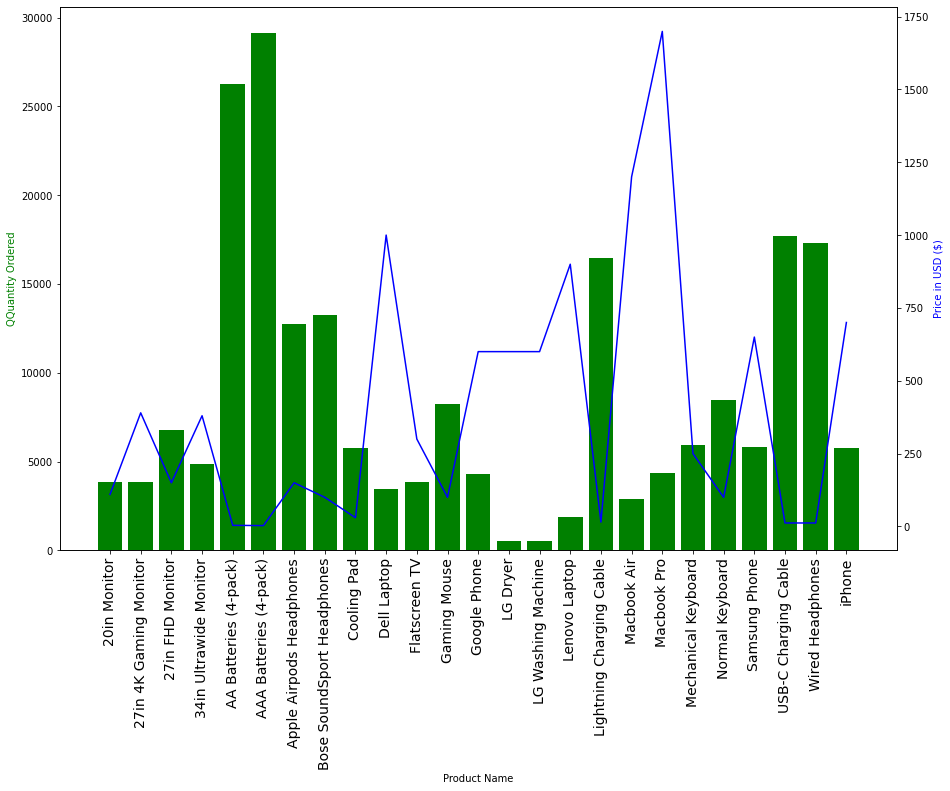

In [31]:
prices = df.groupby('Product').mean()['Price Each']

# plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('QQuantity Ordered', color='g')
ax2.set_ylabel('Price in USD ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8, fontsize=14)

plt.show()

We accept our hypothesis that the less expensive AA and AAA batteries sell more.
<br>
We notice that LG Dryers and Washing machines are pretty expensive and so are sold really less.
<br>
However, even tho the macbook pro and thinkpad are really expensive, they sell more than the dryer and the washing machine because of the buyer base. Students and professionals buy these products. A family may have 3 working professionals with macbook pros for each member but have one dryer and one washing machine. 